#Detecting Age,Ethnicity & Gender using UTKFace detection dataset.

In [1]:
!pip3 install opencv-python

In [2]:
!pip3 install matplotlib

In [3]:
!pip3 install -U scikit-learn

In [1]:
import os
import cv2
import tarfile as tr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [4]:
f = tr.open('./UTKFace.tar')
f.extractall('./images')
f.close()

In [5]:
path = './images/UTKFace/'
for file in os.listdir(path):
  source = path + file
  x = file.split('.')
  rename = x[0]+'.'+x[1]
  dest = path + rename
  os.rename(source,dest)

#check = os.listdir(path)
#print(check)  


In [6]:
bug_image1 = path + '61_1_20170109142408075.jpg'
bug_image2 = path + '39_1_20170116174525125.jpg'
bug_image3 = path + '61_1_20170109150557335.jpg'
os.remove(bug_image1)
os.remove(bug_image2)
os.remove(bug_image3)

In [7]:
image = []
labels = []
path = './images/UTKFace/'
for i in os.listdir(path):
  sp = i.split('_')
  ages = int(sp[0])
  gender = int(sp[1])
  ethnicity = int(sp[2])
  labels.append([[ages],[gender],[ethnicity]])


  img = cv2.imread(os.path.join(path,i))
  img = cv2.resize(img,(128,128))
  image.append(img)






In [8]:
print(labels[6])

[[71], [1], [0]]


In [9]:
new_labels = labels[0:10000]

In [10]:
Y = np.array(new_labels)
print(Y[0:2])

[[[26]
  [ 0]
  [ 1]]

 [[16]
  [ 1]
  [ 3]]]


In [11]:
new_image = image[0:10000]

In [12]:
X = np.array(new_image)

In [13]:
X = X/255

In [14]:
print(X[0].shape)

(128, 128, 3)


In [15]:
print(X.shape)

(10000, 128, 128, 3)


In [16]:
print(Y.shape)

(10000, 3, 1)


male :0 ; female:1,
white:0 ; black:1 ; asian:2 ; indian:3 ; other:4

[]

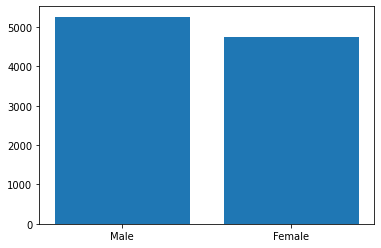

In [20]:

# counting number of males and females
value,count = np.unique(Y[:,1],return_counts=True)
plt.bar(['Male','Female'],count)
plt.plot()


[0 1 2 3 4] [4293 1890 1415 1665  737]


[]

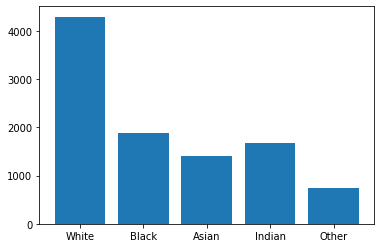

In [17]:

val,cnt = np.unique(Y[:,2],return_counts=True)
print(val,cnt)
plt.bar(['White','Black','Asian','Indian','Other'],cnt)
plt.plot()


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=41)

In [19]:
X_train.shape

(8000, 128, 128, 3)

In [20]:
X_test.shape

(2000, 128, 128, 3)

Building AlexNet

In [27]:
model = keras.Sequential()
model.add(layers.Conv2D(96,(11,11),strides=(4,4),padding='same',activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPool2D((3,3),strides=(2,2)))
model.add(layers.ZeroPadding2D(padding=(2,2)))
model.add(layers.Conv2D(256,(5,5),strides=(1,1),padding='valid',activation='relu'))
model.add(layers.MaxPool2D((3,3),strides=(2,2)))
model.add(layers.ZeroPadding2D(padding=(1,1)))
model.add(layers.Conv2D(384,(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(layers.ZeroPadding2D(padding=(1,1)))
model.add(layers.Conv2D(384,(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(layers.ZeroPadding2D(padding=(1,1)))
model.add(layers.Conv2D(256,(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(layers.MaxPool2D((3,3),strides=(2,2)))
model.add(layers.Dropout(rate=0.5))

model.add(layers.Flatten())
model.add(layers.Dense(4096,activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(4096,activation='relu'))

model.add(layers.Dense(1,activation='relu',name='age'))
model.add(layers.Dense(1,activation='sigmoid',name='gender'))
model.add(layers.Dense(1,activation='softmax',name='ethnicity'))

model2 = keras.Model(inputs = model.inputs,outputs=[model.get_layer(name='age').output, model.get_layer(name='gender').output,model.get_layer(name='ethnicity').output])

model2.compile(optimizer='adam',loss=['mse','binary_crossentropy','sparse_categorical_crossentropy'],metrics=['accuracy'])

model2.summary()




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5_input (InputLayer)  [(None, 128, 128, 3)]    0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 96)       0         
 2D)                                                             
                                                                 
 zero_padding2d_4 (ZeroPaddi  (None, 19, 19, 96)       0         
 ng2D)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 256)        0   

In [28]:
y_train_final = [y_train[:,0],y_train[:,1],y_train[:,2]]
print(y_train_final[1])

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]


In [29]:
y_test_final = [y_test[:,0],y_test[:,1],y_test[:,2]]
print(y_test_final[0])

[[55]
 [ 2]
 [31]
 ...
 [45]
 [54]
 [38]]


In [30]:
train = model2.fit(X_train,y_train_final,batch_size=32,epochs=20,validation_data=(X_test,y_test_final),shuffle=True)

Train on 8000 samples, validate on 2000 samples
Metal device set to: Apple M1


2022-06-22 16:17:44.093896: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-22 16:17:44.095013: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-22 16:17:44.122971: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-06-22 16:17:44.142363: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-22 16:17:44.149143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-22 16:17:44.216279: I tensorflow/core/grappler/optimizers/custom_graph

Epoch 1/20


2022-06-22 16:17:44.848422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-22 16:17:44.875093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-22 16:17:44.898758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-22 16:17:44.921624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-22 16:17:44.944852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-22 16:17:44.967254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-22 16:17:45.013009: I tensorflow/core/grappler/optimizers/cust

8000/8000 [==============================] - ETA: 0s - loss: 509.8120 - age_loss: 488.6196 - gender_loss: 21.1924 - ethnicity_loss: 0.0000e+00 - age_accuracy: 0.0466 - gender_accuracy: 0.4765 - ethnicity_accuracy: 0.1880

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2022-06-22 16:18:20.483570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8000/8000 [==============================] - 39s 5ms/sample - loss: 509.8120 - age_loss: 488.6196 - gender_loss: 21.1924 - ethnicity_loss: 0.0000e+00 - age_accuracy: 0.0466 - gender_accuracy: 0.4765 - ethnicity_accuracy: 0.1880 - val_loss: 440.5252 - val_age_loss: 423.3851 - val_gender_loss: 19.4984 - val_ethnicity_loss: 0.0000e+00 - val_age_accuracy: 0.0540 - val_gender_accuracy: 0.4650 - val_ethnicity_accuracy: 0.1930
Epoch 2/20
8000/8000 [==============================] - 38s 5ms/sample - loss: 427.8351 - age_loss: 409.5243 - gender_loss: 18.3108 - ethnicity_loss: 0.0000e+00 - age_accuracy: 0.0473 - gender_accuracy: 0.4764 - ethnicity_accuracy: 0.1880 - val_loss: 442.9974 - val_age_loss: 427.1253 - val_gender_loss: 14.7643 - val_ethnicity_loss: 0.0000e+00 - val_age_accuracy: 0.0540 - val_gender_accuracy: 0.4650 - val_ethnicity_accuracy: 0.1930
Epoch 3/20
8000/8000 [==============================] - 39s 5ms/sample - loss: 417.6652 - age_loss: 403.7153 - gender_loss: 13.9499 - ethnici

Epoch 20/20
8000/8000 [==============================] - 38s 5ms/sample - loss: 397.5109 - age_loss: 396.4966 - gender_loss: 1.0143 - ethnicity_loss: 0.0000e+00 - age_accuracy: 0.0473 - gender_accuracy: 0.4764 - ethnicity_accuracy: 0.1880 - val_loss: 425.3912 - val_age_loss: 423.3596 - val_gender_loss: 0.9664 - val_ethnicity_loss: 0.0000e+00 - val_age_accuracy: 0.0540 - val_gender_accuracy: 0.4650 - val_ethnicity_accuracy: 0.1930


In [48]:
img_files = os.listdir(path)
i = 440

gender = ['Male', 'Female']
ethnicity = ['White','Black','Asian','Indian','other']
print("Actual Age: " + str(int(img_files[i].split('_')[0])))
print("Actual Gender: " + gender[int(img_files[i].split('_')[1])])
print("Actual Ethnicity: "+ethnicity[int(img_files[i].split('_')[2])])

test = X[i]
prediction = model2.predict(np.array([test]))
print("Predicted Age: " + str(int(np.round(prediction[0][0]))))
print("Predicted Gender: " + gender[int(np.round(prediction[1][0]))])
print("predicted Ethnicity: " + ethnicity[int(np.round(prediction[2][0]))])

Actual Age: 24
Actual Gender: Female
Actual Ethnicity: Black
Predicted Age: 30
Predicted Gender: Female
predicted Ethnicity: Black
